### Knock81: SHAP Model を構築してみよう
SHAP は、学習済み Model において、各説明変数が予測値にどのような影響を与えたかを **「貢献度」**と定義して算出する。
各 Data ごとに結果を出力して、可視化できる。

In [3]:
# 回帰 Model の作成
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
X = df[boston.feature_names]
y = df[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(len(X_train))
display(X_train.head(1))
print(len(X_test))
display(X_test.head(1))

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0).fit(X_train, y_train)

354


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.9,34.41


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.46,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


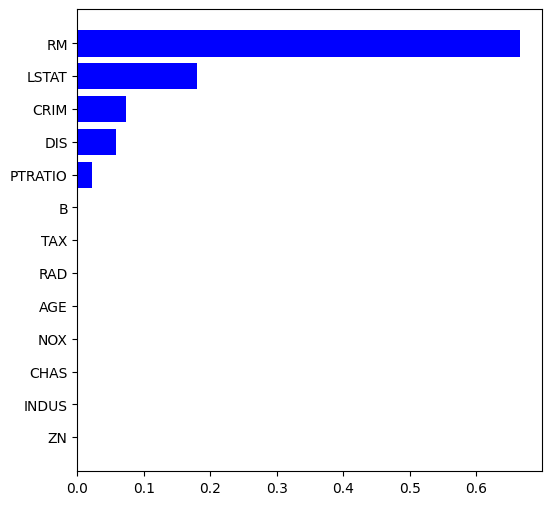

In [4]:
# 説明変数ごとの重要度
import matplotlib.pyplot as plt
import numpy as np

features = X_train.columns
importances = tree_reg.feature_importances_  # 説明変数ごとの重要度を取得
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [5]:
# 予測値の算出
X_test_pred = X_test.copy()
X_test_pred['pred'] = np.round(tree_reg.predict(X_test), 2)  # Test Data で予測値を算出し、結果を説明変数と merge
X_test_pred.describe()[['RM', 'LSTAT', 'CRIM', 'DIS', 'PTRATIO', 'pred']]  # 重要度の高い説明変数の上位５項目と、予測値（pred）の統計値を表示

,RM,LSTAT,CRIM,DIS,PTRATIO,pred
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,6.229224,13.147763,4.207962,3.870929,18.413816,22.185592
std,0.703222,7.284263,9.154813,2.196886,2.025142,8.839852
min,3.863000,1.920000,0.013110,1.129600,12.600000,12.040000
25%,5.878000,7.777500,0.093500,2.032100,16.975000,16.870000
50%,6.157000,12.000000,0.229225,3.142300,18.700000,22.650000
75%,6.514500,17.280000,4.950015,5.491700,20.200000,22.650000
max,8.725000,37.970000,73.534100,10.710300,21.200000,50.000000


In [6]:
# 予測値の表示
display(X_test_pred.sort_values('RM'))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,pred
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,22.65
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,12.04
386,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28,12.04
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29,16.87
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,22.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,46.25
233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,46.25
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,28.55
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,46.25


`.feature_importances_` で予測結果を解釈しようとすると、推測での解釈になることが多く、Business の現場いおいて納得感が得られにくい場合がある。
<br>
<br>


- `feature_importances_` は Model の作成中に、どの説明変数が重要であるかを知るための大域的な指標。
- SHAP は、作成した Model の各説明変数が、どのように予測に寄与しているかを知るための局所的な指標。

それぞれ、使う場面は分けて考える必要がある。

### Knock82: 回帰系 Model の SHAP 値を確認してみよう

In [7]:
# SHAP Model の作成
import shap

explainer = shap.TreeExplainer(tree_reg)
# 回帰系 Model を引数にして SHAP Model を作成。決定木系の Model を解釈するために shap.TreeExplainer() Class を利用

explainer

In [8]:
# SHAP 値の確認
shap_values = explainer.shap_values(X_test)
shap_values

array([[  0.47158564,   0.        ,   0.        , ...,   0.04999327,
          0.        ,   2.57406335],
       [ -1.59632303,   0.        ,   0.        , ...,  -0.52492938,
          0.        ,   8.7650647 ],
       [  0.47158564,   0.        ,   0.        , ...,   0.04999327,
          0.        ,   2.57406335],
       ...,
       [ -2.88802113,   0.        ,   0.        , ...,  -0.52492938,
          0.        , -12.51081884],
       [  0.47158564,   0.        ,   0.        , ...,  -0.52492938,
          0.        ,   2.57406335],
       [  0.47158564,   0.        ,   0.        , ...,  -0.52492938,
          0.        ,   2.57406335]])

#### SHAP
- 入力した Data-set と同じ次元と要素数になる。
- 値が大きいほど予測への影響が大きくなる。
    - 行方向に見れば「特定の予測に、各説明変数がどれくらい貢献したか」と解釈できる
    - 列方向に見れば「予測全体で、その説明変数がどれくらい貢献したか」と解釈できる

### Knock83: 回帰系 Model を summary_plot で解釈してみよう
`shap.summary_plot()` では、どの説明変数が大きく影響していたかを図示してくれる。
大局的に結果を見たい場合に便利。

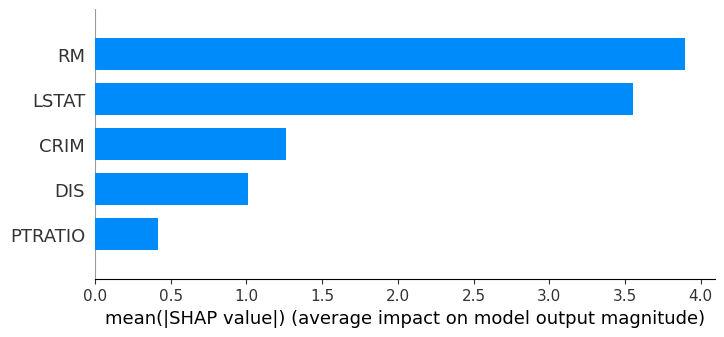

In [9]:
# summary_plot(bar)
shap.summary_plot(
    shap_values=shap_values
    , features=X_test
    , plot_type='bar'  # 各説明変数を貢献度順に確認できる。
    , max_display=5  # 上位項目の表示数を設定。
)

sikit-learn の `.feature_importances` に似た結果になるが、算出方法が異なるため、結果が一致しないこともある。

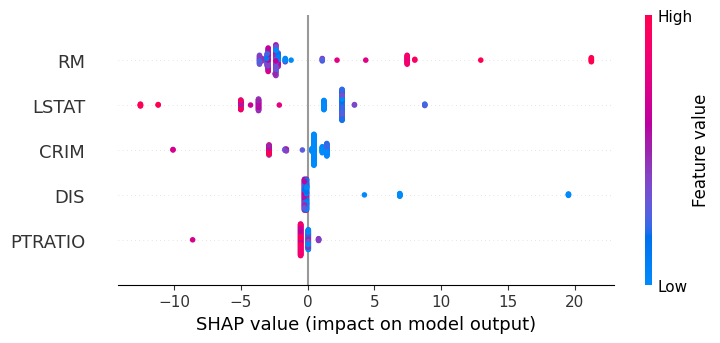

In [10]:
# summary_plot(dot)
shap.summary_plot(
    shap_values=shap_values
    , features=X_test
    , plot_type='dot'
    , max_display=5
)

- 各点: Data
- 横軸: SHAP値
- 縦軸: 説明変数の項目
- 色: 説明変数の大小

### Knock84: 回帰系 Model を dependence_plot で解釈してみよう
`shap.dependence_plot()` は特定の説明変数と SHAP値の散布図で、相関関係を確認する場合に便利。

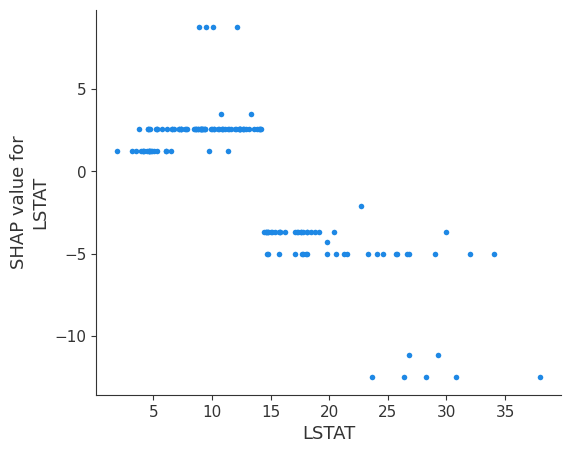

In [11]:
# dependence_plot
shap.dependence_plot(
    ind='LSTAT',  # 確認したい説明変数を指定
    interaction_index=None,  # 色を別の説明変数に指定できる
    shap_values=shap_values,
    features=X_test
)

- 横軸: 説明変数
- 縦軸: 同じ説明変数の SHAP値を plot

説明変数の SHAP値と、値に相関関係がみられるほど、予測への影響度が高くなる。

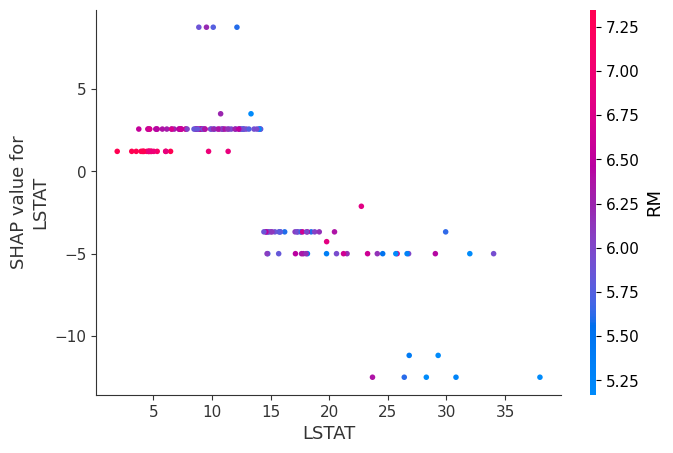

In [12]:
# dependence_plot (interaction_index に RM を指定)
shap.dependence_plot(
    ind='LSTAT',
    interaction_index='RM',
    shap_values=shap_values,
    features=X_test,
)

### Knock85: 回帰系 Model を force_plot で解釈してみよう
`shap.force_plot` は、各Sample ごとの説明変数について、具体的な貢献度を可視化してくれる

In [13]:
# force_plot
shap.initjs()  # force_plot を表示するために必要な前処理
row_index = X_test.index.get_loc(253)  # Data の何行目を確認するか変数に格納
shap.force_plot(
    base_value=explainer.expected_value,  # 与えられた Data の予測値の平均で、全 Data 共通の指標
    shap_values=shap_values[row_index, :],
    features=X_test.iloc[row_index, :]
)

全 Data 共通の指標に対して、各説明変数の SHAP値を足し引きし、最終的に予測した結果が f(x) になる、という見方をする。
- 赤色: y の上昇に貢献した説明変数
- 青色: y の減少に貢献した説明変数

SHAP を利用することで推測なく解釈ができるようになる。

*Model の予測結果 = Model の基礎Score (base_value) + 説明変数の SHAP値の合計 (shap_values)*

### Knock86: 回帰系 Model を waterfall_plot で解釈してみよう

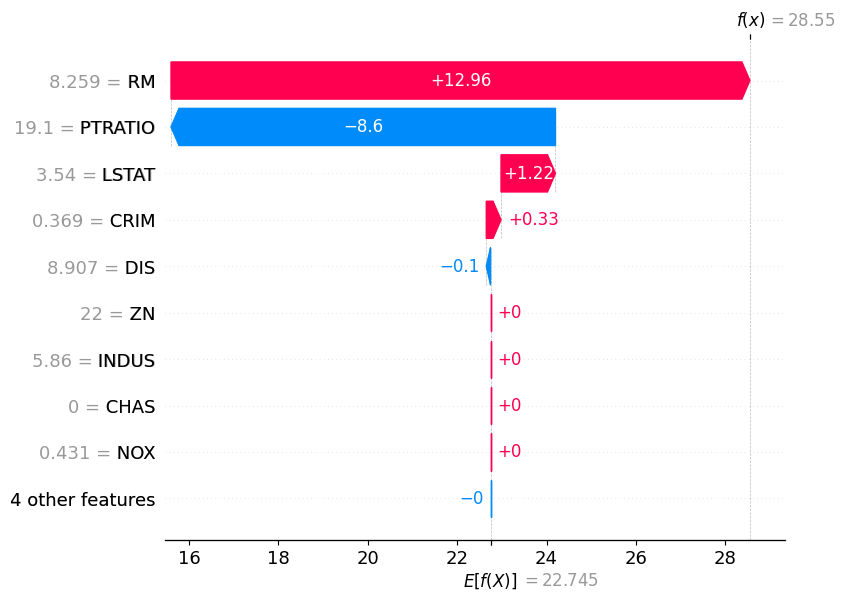

In [14]:
row_index = X_test.index.get_loc(253)
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value[0],
    shap_values=shap_values[row_index, :],
    features=X_test.iloc[row_index, :]
)

force_plot と、表現方法が違うだけなので、好みの方を利用するとよい

### Knock87: 分類系 Model の SHAP値を確認してみよう

In [1]:
# 分類系 Model の作成
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

load_data = load_breast_cancer()
tg_df = pd.DataFrame(load_data.data, columns=load_data.feature_names)
tg_df['y'] = load_data.target
X = tg_df[tg_df.columns[tg_df.columns != 'y']]
y = tg_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train))
display(X_train.head(1))
print(len(X_test))
display(X_test.head(1))
print(len(tg_df))
print(tg_df['y'].unique())

rf_cls = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, y_train)

398


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.49,14.59,73.99,404.9,0.1046,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.4,21.9,82.04,467.6,0.1352,0.201,0.2596,0.07431,0.2941,0.0918


171


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
512,13.4,20.52,88.64,556.7,0.1106,0.1469,0.1445,0.08172,0.2116,0.07325,...,16.41,29.66,113.3,844.4,0.1574,0.3856,0.5106,0.2051,0.3585,0.1109


569
[0 1]


In [2]:
# SHAP Model の作成（分類）
import shap

explainer = shap.TreeExplainer(rf_cls)
explainer

In [3]:
# 分類 Model base の SHAP値
shap_values = explainer.shap_values(X_test)
print(len(shap_values))
shap_values

2


[array([[-0.00204042,  0.00885012, -0.01388   , ...,  0.15536879,
          0.01326914,  0.0218135 ],
        [-0.00573586,  0.00549368, -0.01736674, ..., -0.06183954,
         -0.00312969, -0.00273925],
        [-0.00284455, -0.0068685 , -0.01560846, ..., -0.05823875,
         -0.00325783, -0.00273925],
        ...,
        [-0.00631842,  0.00104957, -0.01727813, ..., -0.02886242,
         -0.00069931, -0.00362251],
        [-0.006364  ,  0.00549368, -0.01871594, ..., -0.06327393,
         -0.00258547, -0.00273925],
        [-0.01347132,  0.0053884 , -0.0230231 , ..., -0.0559037 ,
         -0.00350363, -0.00186549]]),
 array([[ 0.00204042, -0.00885012,  0.01388   , ..., -0.15536879,
         -0.01326914, -0.0218135 ],
        [ 0.00573586, -0.00549368,  0.01736674, ...,  0.06183954,
          0.00312969,  0.00273925],
        [ 0.00284455,  0.0068685 ,  0.01560846, ...,  0.05823875,
          0.00325783,  0.00273925],
        ...,
        [ 0.00631842, -0.00104957,  0.01727813, ...,  

### Knock88: 分類系 Model を summary_plot で解釈してみよう

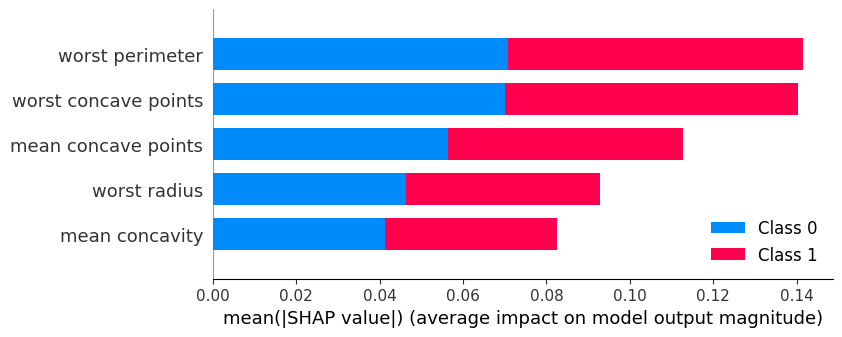

In [4]:
# summary_plot
shap.summary_plot(
    shap_values=shap_values,
    features=X_train,
    plot_type='bar',
    max_display=5
)

分類系の Model では `plot_type='bot'` は対応していない。

### Knock89: 分類系 Model を dependence_plot で解釈してみよう

class  0


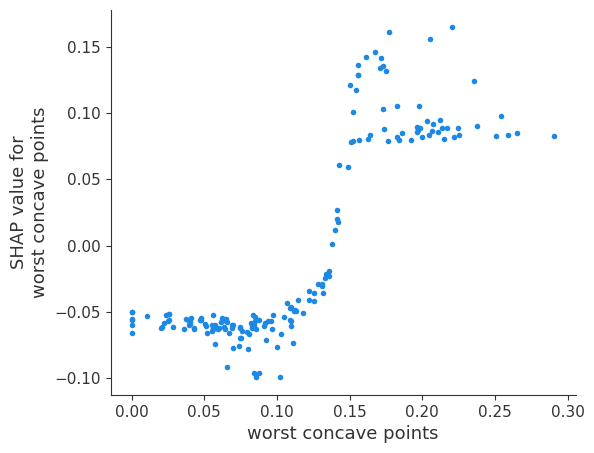

class  1


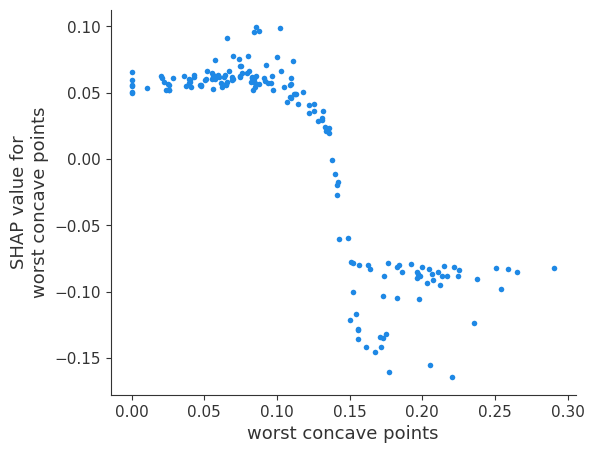

In [6]:
# dependence_plot
for i in range(2):
    print('class ', i)
    shap.dependence_plot(
        ind='worst concave points',
        interaction_index=None,
        shap_values=shap_values[i],
        features=X_test
    )

二値分類の場合、Loop させて各Category ごとの SHAP値で `.dependence_plot()` を表示させる。
同じ Data に対して、陽性か、陰性かという２つの Category に対する Score が表示されている。

### Knock90: 分類系の Model を force_plot で解釈してみよう

In [7]:
# force_plot
shap.initjs()
row_index = 2
for i in range(2):  # Loop させて各Category ごとの SHAP値で表示
    print('Class ', 1)
    display(shap.force_plot(explainer.expected_value[i], shap_values[i][row_index, :], X_test.iloc[row_index, :]))

Class  1


Class  1
